## Notebook Imports

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Constants

In [133]:
Token_Spam_Prob_File='SpamData/03_Testing/prob-spam.txt'
Token_Ham_Prob_File='SpamData/03_Testing/prob-ham.txt'
Token_All_Prob_File='SpamData/03_Testing/prob-all-tokens.txt'

Test_Feature_Matrix='SpamData/03_Testing/test-features.txt'
Test_Target_File='SpamData/03_Testing/test-target.txt'

Vocab_size=2500

## Load the Data

In [134]:
# Features
X_test=np.loadtxt(Test_Feature_Matrix,delimiter=' ')
#Target
y_test=np.loadtxt(Test_Target_File,delimiter=' ')
#Token Probabilities
prob_token_spam=np.loadtxt(Token_Spam_Prob_File,delimiter=' ')
prob_token_ham=np.loadtxt(Token_Ham_Prob_File,delimiter=' ')
prob_all_tokens=np.loadtxt(Token_All_Prob_File,delimiter=' ')

## Calculating the Joint Probability 

#### The Dot Product

In [135]:
a=np.array([1,2,3])
b=np.array([0,5,4])
print("a : ",a)
print("b : ",b)

a :  [1 2 3]
b :  [0 5 4]


In [136]:
a.dot(b)

22

In [137]:
1*0+2*5+3*4

22

In [138]:
c=np.array([[0,6],[3,0],[5,1]])
print("shape of c is : ",c.shape)

shape of c is :  (3, 2)


In [139]:
print(a.dot(c))
print('shape of dot product is : ',a.dot(c).shape)

[21  9]
shape of dot product is :  (2,)


In [140]:
# a.dot(c)  [1,2,3]*[[0,6],[3,0],[5,1]]
[1*0 + 2*3 + 3*5,  1*6 + 2*0 + 3*1 ]

[21, 9]

dot product b/w X_test & prob_token_spam

In [141]:
print(prob_token_spam.shape)
print(X_test.shape)

(2500,)
(1720, 2500)


In [142]:
print("shape of dot product is : ", X_test.dot(prob_token_spam).shape)

shape of dot product is :  (1720,)


## Set the Prior

$$P(spam \, | \, X)= \frac{p(X \, | \, Spam \,) \, P(Spam)} {P(X)} $$



In [143]:
PROB_SPAM=0.3116  
# calculate early in training 0.3116753796365447

In [144]:
np.log(prob_token_spam)

array([ -4.56433756,  -5.37769419,  -5.0310812 , ...,  -9.94781274,
       -11.04642503,  -8.96698348])

## Joint Probability in log format

In [145]:
joint_log_spam=X_test.dot(np.log(prob_token_spam)-np.log(prob_all_tokens))+np.log(PROB_SPAM)


C:\Users\mayan\AppData\Local\Temp\ipykernel_14696\2482553600.py:1: RuntimeWarning: divide by zero encountered in log
  joint_log_spam=X_test.dot(np.log(prob_token_spam)-np.log(prob_all_tokens))+np.log(PROB_SPAM)


In [146]:
joint_log_spam.shape


(1720,)

$$P(ham \, | \, X)= \frac{p(X \, | \, Ham \,) \, (1-P(Spam))} {P(X)} $$

In [147]:
joint_log_ham=X_test.dot(np.log(prob_token_ham)-np.log(prob_all_tokens))+np.log(1-PROB_SPAM)


C:\Users\mayan\AppData\Local\Temp\ipykernel_14696\3562712959.py:1: RuntimeWarning: divide by zero encountered in log
  joint_log_ham=X_test.dot(np.log(prob_token_ham)-np.log(prob_all_tokens))+np.log(1-PROB_SPAM)


In [148]:
joint_log_ham[:5]

array([nan, nan, nan, nan, nan])

# Making Predictions

### Checking for the higher joint probability

$$P(spam \, | \, x) \, > \, P(Ham \, | \, X)$$
<center>OR</center>

$$P(spam \, | \, x) \, < \, P(Ham \, | \, X)$$


#### simplify

In [149]:

joint_log_ham=X_test.dot(np.log(prob_token_ham))+np.log(1-PROB_SPAM)
joint_log_spam=X_test.dot(np.log(prob_token_spam))+np.log(PROB_SPAM)



In [150]:
prediction=joint_log_spam>joint_log_ham

In [151]:
prediction[-5:]

array([False, False, False, False, False])

In [152]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

## Metrics and Evaluation

### Accuracy

In [153]:
correct_docs=(y_test==prediction).sum()

In [154]:
print("Docs classified correctly " ,correct_docs)
numdocs_wrong=X_test.shape[0]-correct_docs
print("Docs classified incorrectly : ",numdocs_wrong)

Docs classified correctly  1686
Docs classified incorrectly :  34


In [155]:
#Accuracy
correct_docs/len(X_test)

0.9802325581395349

In [156]:
fraction_wrong=numdocs_wrong/len(X_test)
print("fraction classified incorrectly : {:2%}".format(fraction_wrong))
print("Accuracy of the model is {:.2%}".format(1-fraction_wrong))

fraction classified incorrectly : 1.976744%
Accuracy of the model is 98.02%


## visualising the result
 

In [157]:
#chart style info
yaxis_label='P(X | Spam)'
xaxis_label='P(X | Nonspam)'

linedata=np.linspace(start=-14000,stop=1,num=1000)

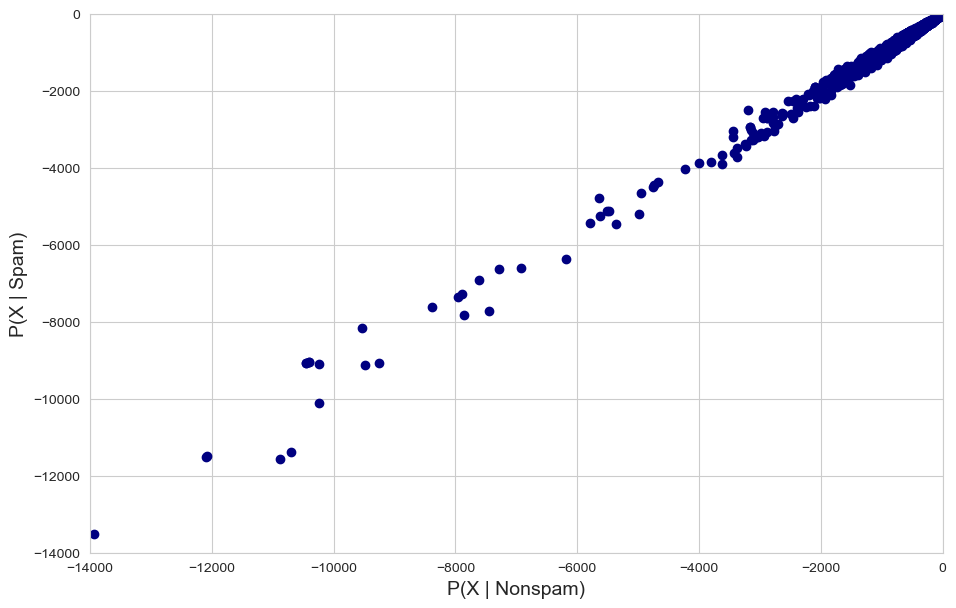

In [158]:
plt.figure(figsize=(11,7))
plt.xlabel(xaxis_label,fontsize=14)
plt.ylabel(yaxis_label,fontsize=14)

plt.xlim([-14000,1])
plt.ylim([-14000,1])
plt.scatter(joint_log_ham,joint_log_spam,color='navy')
plt.show()


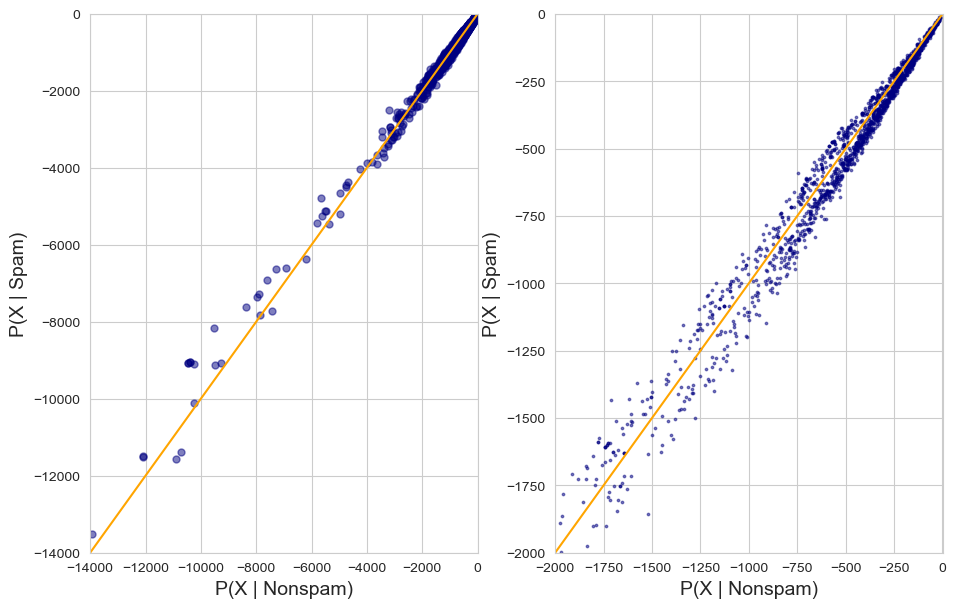

In [159]:
plt.figure(figsize=(11,7))
plt.subplot(1,2,1)
plt.xlabel(xaxis_label,fontsize=14)
plt.ylabel(yaxis_label,fontsize=14)

plt.xlim([-14000,1])
plt.ylim([-14000,1])
plt.scatter(joint_log_ham,joint_log_spam,color='navy',alpha=0.5,s=25)
plt.plot(linedata,linedata,color='orange')

plt.subplot(1,2,2)

plt.xlabel(xaxis_label,fontsize=14)
plt.ylabel(yaxis_label,fontsize=14)

plt.xlim([-2000,1])
plt.ylim([-2000,1])
plt.scatter(joint_log_ham,joint_log_spam,color='navy',alpha=0.5,s=3)
plt.plot(linedata,linedata,color='orange')

plt.show()

In [160]:
#chart styling
sns.set_style("whitegrid")
labels='Actual Category'

summary_df=pd.DataFrame({yaxis_label:joint_log_spam, xaxis_label:joint_log_ham,labels:y_test})

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


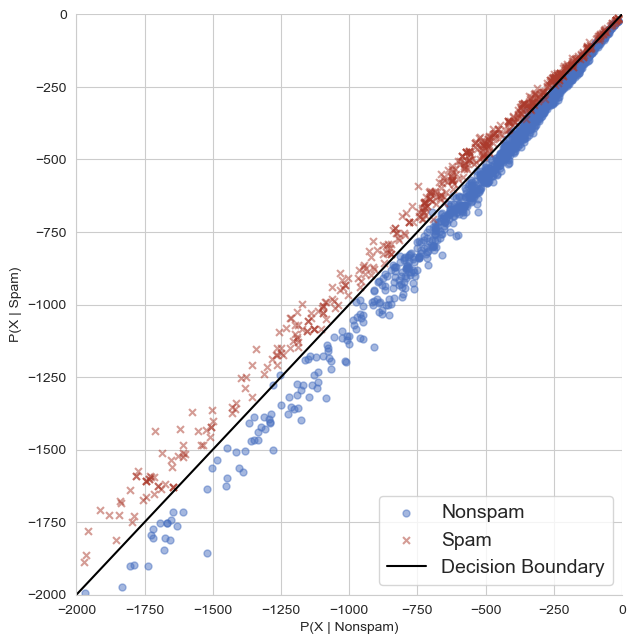

In [161]:
my_color=['#4A71C0','#AB3A2C']
sns.lmplot(x=xaxis_label,y=yaxis_label,data=summary_df,size=6.5,fit_reg=False,legend=False,
           scatter_kws={'alpha':0.5,'s':25},hue=labels,markers=['o','x'],palette=my_color)
plt.xlim([-2000,1])
plt.ylim([-2000,1])
plt.plot(linedata,linedata,color='black')
plt.legend(('Nonspam','Spam','Decision Boundary'),loc='lower right',fontsize=14)

plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


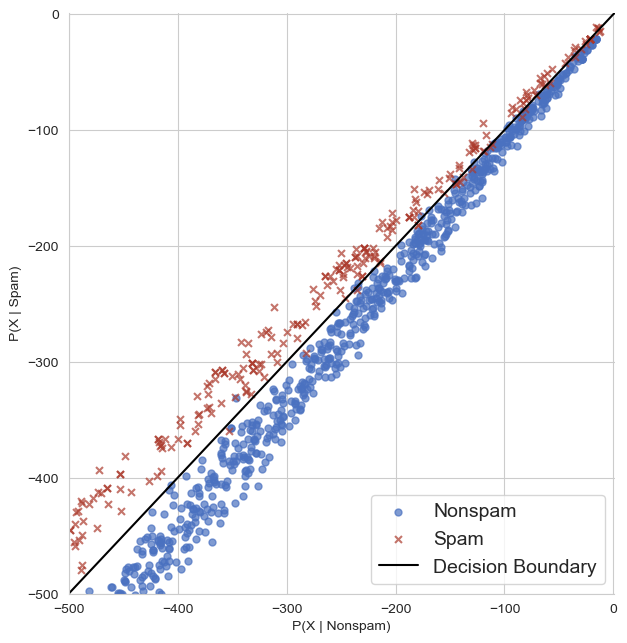

In [162]:
my_color=['#4A71C0','#AB3A2C']
sns.lmplot(x=xaxis_label,y=yaxis_label,data=summary_df,size=6.5,fit_reg=False,legend=False,
           scatter_kws={'alpha':0.7,'s':25},hue=labels,markers=['o','x'],palette=my_color)
plt.xlim([-500,1])
plt.ylim([-500,1])
plt.plot(linedata,linedata,color='black')
plt.legend(('Nonspam','Spam','Decision Boundary'),loc='lower right',fontsize=14)

plt.show()

### False Positives and False Negatives

In [163]:
np.unique(prediction,return_counts=True)

(array([False,  True]), array([1147,  573], dtype=int64))

In [164]:
true_pos=(y_test==1) & (prediction==1)

In [165]:
true_pos.sum()

562

In [166]:
false_pos=(y_test==0)& (prediction==1)
false_pos.sum()


11

In [167]:
false_neg=(y_test==1)& (prediction==0)
false_neg.sum()

23

$$Recall\, score = \frac{true \, positives}{true \, positives + false \, negatives}$$

In [171]:
recall_score=true_pos.sum()/(true_pos.sum()+false_neg.sum())
print('Recall score is {:.2%}'.format(recall_score))

Recall score is 96.07%


$$Precision = \frac{true \, positives}{true \, positives + false \, positives}$$


In [172]:
precision_score=true_pos.sum()/(true_pos.sum()+false_pos.sum())
print('Precision score is {:.2%}'.format(precision_score))


Precision score is 98.08%


precision inverse of recall

$$F-Score = 2 *\frac{precision * recall }{precision + recall}$$


In [177]:
f1_score=2*(precision_score*recall_score)/(precision_score+recall_score)
print('F1 score is {:.2}'.format(f1_score))


F1 score is 0.97
